In [1]:
#author: Saba Khalid

In [2]:
#import libraries
import os
import sys
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import sqlalchemy.types
import matplotlib.pyplot as plt
import seaborn as sns
#load the spotipy api:
import spotipy 
import spotipy.util as util

In [3]:
#import variables from staging.env file:
from dotenv import load_dotenv
sys.path.insert(0, os.environ["HOME"])
dotenv_path=os.environ["HOME"] +'/staging.env'
#dotenv_path = os.environ['HOME'] + '/staging.env'
load_dotenv(dotenv_path)
locals().update(os.environ)

In [4]:
#create database connection:
engine = create_engine('sqlite:///RapCaviar.db', echo=False)
conn =engine.connect()

In [5]:
token = util.prompt_for_user_token('Puffer Fish', scope = scope,
                                   client_id = SPOTIPY_CLIENT_ID, client_secret= SPOTIPY_CLIENT_SECRET,
                                   redirect_uri =SPOTIPY_REDIRECT_URI)

In [6]:
if token:
    spotify = spotipy.Spotify(auth=token)
    #fetch playlists;
    playlists = spotify.user_playlists('spotify')      
    for playlist in playlists['items']:    
        if rap_caviar in playlist['id']:    
            print ("Total songs in playlist ", playlist['name'], " are : " , playlist['tracks']['total'])
            #fetch track info from playlist RapCaviar:
            response = spotify.playlist_tracks(playlist['id'], fields ="items.track.name, items.track.popularity, items.track.duration_ms, items.track.artists")
            #create an empty df for Track info:
            columns_name = ["name", "track_popularity", "duration_ms","artists_name"]
            track_df =pd.DataFrame(columns = columns_name)
            #create an empty df for Artist info:
            col= ["artist_name","artist_id","artist_popularity", "artist_followers", "track_name"]
            artist_df = pd.DataFrame(columns= col)
        
            z = 0
            for i in range(0, len(response['items'])):
                try:
                    track_df.loc[i,'name'] = response['items'][i]['track']['name']
                except:
                    track_df.loc[i,'name'] =''
                try:
                    track_df.loc[i,'track_popularity'] = response['items'][i]['track']['popularity']
                except:
                    track_df.loc[i, 'track_popularity'] = ''
                try:
                    track_df.loc[i,'duration_ms'] = response['items'][i]['track']['duration_ms']
                except:
                    track_df.loc[i, 'duration_ms'] =''   
                try:
                    track_df.loc[i,'artists_name']= response['items'][i]['track']['artists'][0]['name']
                except:
                    track_df.loc[i,'artists_name']= ''
                
                for j in range(0, len(response['items'][i]['track']['artists'])):
                    try:
                        
                        artist_df.loc[z,'track_name']= response['items'][i]['track']['name']
                    except:
                        artist_df.loc[z,'track_name']= ''
                        
                    try:
                        artist_df.loc[z,'artist_name'] = response['items'][i]['track']['artists'][j]['name']
                    except:
                        artist_df.loc[z,'artist_name'] = ''
                    try:
                        artist_df.loc[z,'artist_id'] = response['items'][i]['track']['artists'][j]['id']
                    except:
                        artist_df.loc[z,'artist_id'] = ''
                        
                    artist_uri =response['items'][i]['track']['artists'][j]['uri']
                    
                    if 'artist' in artist_uri:
                        artist = spotify.artist(artist_uri) 
                        try:
                            artist_df.loc[z,'artist_followers']= artist['followers']['total']
                        except:
                            artist_df.loc[z,'artist_followers']= ''
                        try:  
                            artist_df.loc[z,'artist_popularity']=artist['popularity']
                        except:
                            artist_df.loc[z,'artist_popularity']= ''       
                    else:
                        pass
                    
                    z= z+1

Total songs in playlist  RapCaviar  are :  50


In [7]:
artist_df #*added track_name as an additional columns*#

,artist_name,artist_id,artist_popularity,artist_followers,track_name
0,Drake,3TVXtAsR1Inumwj472S9r4,96,45951343,Toosie Slide
1,NLE Choppa,0ErzCpIMyLcjPiwT4elrtZ,84,1220255,Walk Em Down (feat. Roddy Ricch)
2,Roddy Ricch,757aE44tKEUQEqRuT6GnEB,92,2181465,Walk Em Down (feat. Roddy Ricch)
3,Jack Harlow,2LIk90788K0zvyj2JJVwkJ,80,203639,WHATS POPPIN
4,NAV,7rkW85dBwwrJtlHRDkJDAC,82,1909458,Turks (feat. Travis Scott)
...,...,...,...,...,...
90,DaBaby,4r63FhuTkUYltbVAg5TQnk,91,2616545,Sick (feat. DaBaby)
91,TOKYO’S REVENGE,5TbLOwv8BNnik3f03NZJlt,72,101877,GOODMORNINGTOKYO!
92,Fivio Foreign,14CHVeJGrR5xgUGQFV5BVM,67,39768,Big Drip (feat. Lil Baby & Quavo) - Remix
93,Lil Baby,5f7VJjfbwm532GiveGC0ZK,92,3809844,Big Drip (feat. Lil Baby & Quavo) - Remix


In [8]:
track_df

,name,track_popularity,duration_ms,artists_name
0,Toosie Slide,86,247058,Drake
1,Walk Em Down (feat. Roddy Ricch),85,173288,NLE Choppa
2,WHATS POPPIN,83,139741,Jack Harlow
3,Turks (feat. Travis Scott),86,161377,NAV
4,Blueberry Faygo,93,162546,Lil Mosey
5,Myron,86,224954,Lil Uzi Vert
6,Broke In A Minute,82,132023,Tory Lanez
7,Suicidal (Remix) [feat. Juice WRLD],86,225857,YNW Melly
8,PTSD,84,232064,G Herbo
9,P2,88,234626,Lil Uzi Vert


In [9]:
#ingest track_df into database:      
track_df.to_sql('Tracks',con =engine, index=False, if_exists='replace',
                dtype={"name": sqlalchemy.types.NVARCHAR(length=255),
                       "track_popularity": sqlalchemy.types.Integer(),
                       "duration_ms": sqlalchemy.types.Integer(),
                       "artists_name":sqlalchemy.types.NVARCHAR(length=255)
                       })

In [10]:
#read the database into df: to test that table is correct                                                                                                                             
table_artists = pd.read_sql("select * from Artists;", con=engine)   

In [11]:
#ingest artist_df into database:
artist_df.to_sql('Artists', con =engine, index=False, if_exists='replace',
                dtype={"artist_name": sqlalchemy.types.NVARCHAR(length=255),
                       "artist_id": sqlalchemy.types.NVARCHAR(length=255),
                       "artist_popularity": sqlalchemy.types.Integer(),
                       "artist_followers":sqlalchemy.types.Integer(),
                       "track_name":sqlalchemy.types.NVARCHAR(length=255)
                       }) 

In [12]:
#read the database into df:
table_tracks = pd.read_sql("select * from Tracks;", con=engine) 

In [13]:
#get the number of songs inside the playlist :RapCaviar" 
query = """
        SELECT COUNT(*) FROM Tracks;
        """
        
number_songs_playlist = pd.read_sql(query, con=engine)

In [14]:
number_songs_playlist #total songs in the playlits Rap Caviar

,COUNT(*)
0,50


In [15]:
#which song is the longest:
query="""
        SELECT name, duration_ms 
        FROM Tracks
        WHERE duration_ms = (SELECT MAX(duration_ms) FROM Tracks);
       """
longest_song = pd.read_sql(query, con=engine)

In [16]:
longest_song #longest song based on duration_ms

,name,duration_ms
0,"Life Is Good (feat. Drake, DaBaby & Lil Baby) ...",315346


In [17]:
longest_song = longest_song['name'].values[0]

In [18]:
longest_song

'Life Is Good (feat. Drake, DaBaby & Lil Baby) - Remix'

In [19]:
#What are the top 5 tracks by artist follower count

query ="""
        SELECT track_name, artist_name, artist_followers
        FROM Artists
        ORDER BY artist_followers DESC
        LIMIT 5;
        """
top_5_tracks = pd.read_sql(query, con=engine)

In [20]:
top_5_tracks #top 5 tracks based on artist followers:

,track_name,artist_name,artist_followers
0,Toosie Slide,Drake,45951343
1,Oprah’s Bank Account (Lil Yachty & DaBaby feat...,Drake,45951343
2,"Life Is Good (feat. Drake, DaBaby & Lil Baby) ...",Drake,45951343
3,Godzilla (feat. Juice WRLD),Eminem,34195568
4,Yikes,Nicki Minaj,17388120


In [21]:
top_5_tracks = top_5_tracks['track_name']

In [22]:
top_5_tracks

0                                         Toosie Slide
1    Oprah’s Bank Account (Lil Yachty & DaBaby feat...
2    Life Is Good (feat. Drake, DaBaby & Lil Baby) ...
3                          Godzilla (feat. Juice WRLD)
4                                                Yikes
Name: track_name, dtype: object

In [23]:
#To find the relationship between artist_popularity and artist_popularity:
#perform a left join:
#assuming we are only considering artist_popularity for artists in the Tracks table:
query = """
        SELECT T.name,T.artists_name,T.track_popularity, A.artist_popularity
        FROM Tracks T
        LEFT JOIN Artists A
        ON T.artists_name = A.artist_name
        AND T.name =A.track_name
        GROUP BY T.name
        """
join_tables = pd.read_sql(query, con=engine)

In [24]:
join_tables #added track name and artist name to confirm and test:

,name,artists_name,track_popularity,artist_popularity
0,2 Seater (feat. G-Eazy & Offset),YBN Nahmir,75,72
1,Apollo,Smoove'L,74,62
2,Banana Split (with YNW Melly feat. Lil Durk),Murda Beatz,72,69
3,Big Drip (feat. Lil Baby & Quavo) - Remix,Fivio Foreign,70,67
4,Blueberry Faygo,Lil Mosey,93,86
5,Broke In A Minute,Tory Lanez,82,85
6,Cardigan,Don Toliver,80,83
7,Commercial (feat. Lil Uzi Vert),Lil Baby,80,92
8,Contact (feat. Tyga),Wiz Khalifa,76,86
9,DO DAT (feat. DaBaby & Lil Baby),Stunna 4 Vegas,73,77


In [25]:
corr= join_tables.corr(method='pearson')
print ("The corelation between track popularity and artist popularity is: \n", corr)

The corelation between track popularity and artist popularity is: 
                    track_popularity  artist_popularity
track_popularity           1.000000           0.458733
artist_popularity          0.458733           1.000000


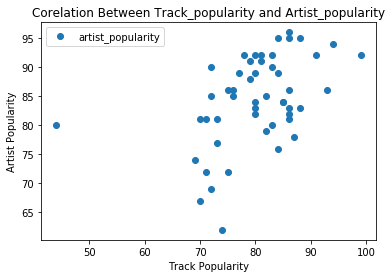

In [26]:
#plots to show visualizations:
join_tables.plot(x='track_popularity', y='artist_popularity', style='o', title='Corelation Between Track_popularity and Artist_popularity')
plt.xlabel("Track Popularity")
plt.ylabel("Artist Popularity")
plt.show()



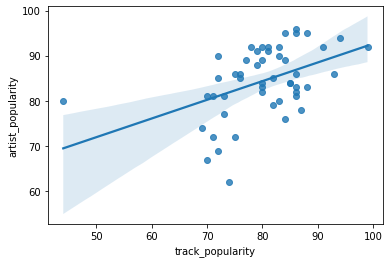

In [27]:
#same plot but with a corelation line;
sns.regplot(x='track_popularity', y='artist_popularity', data=join_tables)

In [28]:
conn.close()